In [24]:
import pandas as pd
import json

In [36]:
out = pd.read_json('posts_2020.json')

In [37]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 4 columns):
authorName    513 non-null object
id            513 non-null int64
likes         513 non-null object
timestamp     513 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 16.1+ KB


In [38]:
if out['likes'].dtype == 'object':
    out['likes'] = out['likes'].apply(lambda x: (x.replace("K", "49").replace(".","") if ("K" in x) else x))
from datetime import datetime
out.likes = out.likes.astype('int64')
if out['timestamp'].dtype == 'int64':
    out = out[out['timestamp'] > 0]
    out['timestamp'] = out['timestamp'].apply(lambda x: datetime.fromtimestamp(x))


In [39]:
out.sort_values('timestamp')

,authorName,id,likes,timestamp
415,Juke Tornado,1231837943518720,1349,2017-02-15 02:08:25
451,Manlu Liu,1262726123763235,149,2017-03-20 19:49:35
12,Annissa Idris,1264336396935541,1249,2017-03-22 14:06:06
340,Jackson Betz,1267725423263305,2349,2017-03-25 19:44:37
29,Freddy Chang,1274136595955521,2949,2017-03-31 17:21:38
198,Andrew Levine,1278994048803109,622,2017-04-04 23:00:15
434,Rohan Savargaonkar,1281093611926486,642,2017-04-06 17:39:22
301,Evan Weinstein,1282621731773674,901,2017-04-07 22:34:08
277,Ian Hutton,1289545384414642,1149,2017-04-13 23:05:43
379,Alyssa Furukawa,1290394910996356,828,2017-04-14 18:39:41


In [131]:
import pylab as plt
import scipy.stats as st
from datetime import datetime
import numpy as np 

In [46]:
min(out['timestamp'].astype('int64'))

1558363195000000000

In [45]:
out = out[out['timestamp'].astype('int64') > 1558330322000000000] # all posts > may 20 2019 12AM

In [135]:
print(np.mean(out['likes']))
print(np.std(out['likes']))

244.09047619047618
239.77410282490382


In [76]:
line = st.linregress(out['timestamp'].astype('int64') - min(out['timestamp'].astype('int64')), out['likes'])
m = line.slope
b = line.intercept
print(line)
ys = [(m*(x - min(out['timestamp'].astype('int64'))) + b) for x in out['timestamp'].astype('int64')]
xs = out['timestamp'].sort_values()
print(m)
ra = out.sort_values('timestamp')
ra['likesAvg'] = ra['likes'].rolling(window=10).mean()
ra.fillna(0)

LinregressResult(slope=-1.4773178753062227e-15, intercept=271.3262712725196, rvalue=-0.05006910582316387, pvalue=0.3059791650706416, stderr=1.4413548810724678e-15)
-1.4773178753062227e-15


,authorName,id,likes,timestamp,hour,likesAvg
469,Michael Schwoerer,2186912644677907,102,2019-05-20 14:39:55,14,0.0
465,Anton Relin,2201440773225094,166,2019-05-29 12:28:26,12,0.0
388,Isaias Jacinto,2201685546533950,1249,2019-05-29 15:37:42,15,0.0
436,Afrah Mohammad,2202654946437010,42,2019-05-30 05:35:52,5,0.0
462,Syed Noman Quadri,2210022705700234,9,2019-06-03 14:16:32,14,0.0
281,Nicholas Bausenwein,2222738091095362,655,2019-06-10 21:40:46,21,0.0
461,Anton Relin,2224181004284404,327,2019-06-11 17:39:13,17,0.0
457,Sofia Rabaté,2232106950158476,44,2019-06-16 01:02:40,1,0.0
459,Nikolas Alvelo,2237470629622108,81,2019-06-19 04:51:42,4,0.0
454,Lena Leszinsky,2245364688832702,156,2019-06-23 15:05:01,15,283.1


(array([737241., 737303., 737364., 737425., 737485., 737546.]),
 <a list of 6 Text xticklabel objects>)

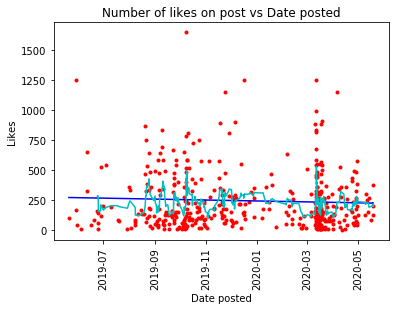

In [111]:
plt.plot(out['timestamp'], out['likes'], 'r.')
plt.plot(out['timestamp'], ys, 'b-')
plt.plot(out['timestamp'].sort_values(), ra['likesAvg'], 'c-')
plt.title("Number of likes on post vs Date posted")
plt.xlabel("Date posted")
plt.ylabel("Likes")
plt.xticks(rotation='vertical')

Max posts per day on 2020-03-11 of 23 posts


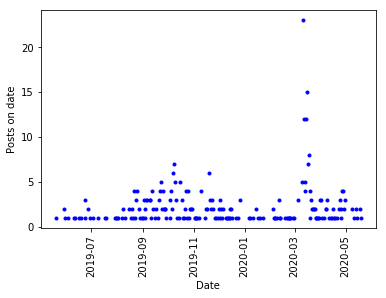

In [114]:
groups = out.groupby(out['timestamp'].map(lambda x: x.date()))
calc = groups.count()['id'].reset_index().sort_values('timestamp')
plt.plot(calc['timestamp'], calc['id'], 'b.')
plt.ylabel("Posts on date")
plt.xlabel("Date")
plt.xticks(rotation='vertical')
print(f"Max posts per day on {calc.iloc[(calc['id']).idxmax()]['timestamp']} of {calc.iloc[(calc['id']).idxmax()]['id']} posts")

In [127]:
max_likes = out.sort_values('likes', ascending=False)
max_likes = max_likes.reset_index()
max_likes.index += 1
max_likes[['authorName', 'id', 'likes']].rename(columns={'likes': 'Likes (for posts > 1K likes, estimated likes)'})

,authorName,id,"Likes (for posts > 1K likes, estimated likes)"
1,Santana Browning,2435028423199660,1649
2,Selene Li,2774685662567266,1249
3,Isaias Jacinto,2201685546533950,1249
4,Hannah Chang,2589739001061934,1249
5,Pierre Li Peters,2534941859874982,1149
6,Elizabeth Meisenzahl,2831497873552711,1149
7,Giovanna Sena,2774669472568885,992
8,Felix Cui,2791140070921825,909
9,Joyee Au Yeung,2563540293681805,903
10,Mary Frances Kline,2520537167982118,893


(array([737241., 737303., 737364., 737425., 737485., 737546.]),
 <a list of 6 Text xticklabel objects>)

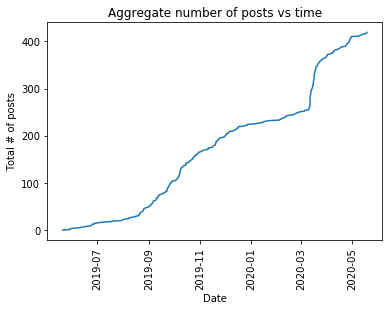

In [128]:
o = out.sort_values('timestamp').reset_index()
plt.plot(o['timestamp'],  o.index)
plt.title("Aggregate number of posts vs time")
plt.ylabel("Total # of posts")
plt.xlabel("Date")
plt.xticks(rotation='vertical')

In [11]:
out.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 4 columns):
authorName    1403 non-null object
id            1402 non-null float64
likes         1403 non-null int64
timestamp     1403 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 43.9+ KB


In [50]:
r = out.groupby('authorName').aggregate({ 'likes': sum }).sort_values('likes', ascending=False).reset_index()
r.index += 1
r

,authorName,likes
1,Anton Relin,3936
2,Isaias Jacinto,2831
3,Kai JH,2234
4,Santana Browning,2042
5,Pierre Li Peters,1622
6,Mary Frances Kline,1585
7,Afrah Mohammad,1450
8,Joyee Au Yeung,1447
9,Rosie Nguyen,1337
10,Elizabeth Meisenzahl,1309


In [51]:
out['hour'] = out['timestamp'].apply(lambda x: x.hour)
out.groupby('hour').likes.count().sort_values(ascending=False)

hour
21    40
22    39
19    32
2     27
23    26
16    26
1     25
3     25
18    23
17    22
20    21
0     17
15    16
14    15
5     14
4     14
13    10
12     7
6      6
11     6
7      4
8      3
10     1
9      1
Name: likes, dtype: int64

Text(0.5, 0, 'Hour of day (0-24)')

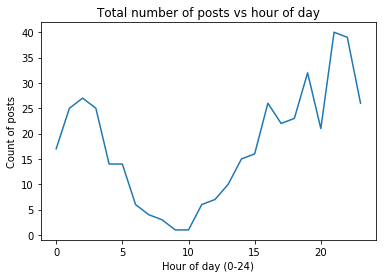

In [52]:
plt.plot(out.groupby('hour').likes.count())
plt.title("Total number of posts vs hour of day")
plt.ylabel("Count of posts")
plt.xlabel("Hour of day (0-24)")

Text(0.5, 0, 'Hour of day (0-24)')

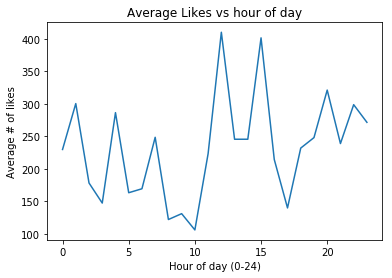

In [53]:
plt.plot(out.groupby('hour').likes.mean())
plt.title("Average Likes vs hour of day")
plt.ylabel("Average # of likes")
plt.xlabel("Hour of day (0-24)")


In [54]:
out.groupby('hour').likes.mean().sort_values(ascending=False)

hour
12    410.142857
15    401.500000
20    321.142857
1     300.360000
22    298.692308
4     286.428571
23    271.538462
7     248.500000
19    248.031250
14    245.533333
13    245.500000
21    238.875000
18    231.913043
0     229.764706
11    223.333333
16    214.307692
2     178.222222
6     169.333333
5     163.214286
3     147.320000
17    139.818182
9     131.000000
8     122.000000
10    106.000000
Name: likes, dtype: float64

In [55]:
out['timestamp'][0].tz_localize('US/Eastern')

Timestamp('2020-05-18 20:16:33-0400', tz='US/Eastern')

Text(0, 0.5, 'Count in bucket')

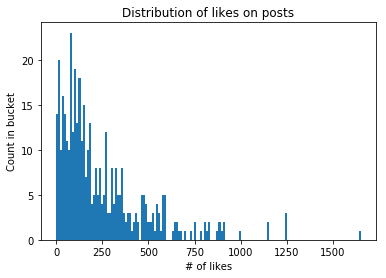

In [56]:
plt.hist(out['likes'], bins=150)
plt.title("Distribution of likes on posts")
plt.xlabel("# of likes")
plt.ylabel("Count in bucket")

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


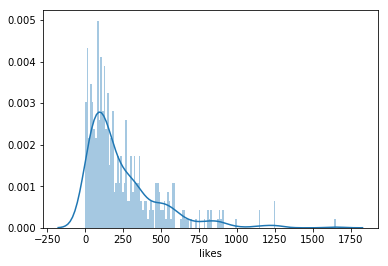

In [57]:
import seaborn as sns
sns.distplot(out['likes'], bins=150, kde=True, hist=True)


In [58]:
out.sort_values('likes',ascending=False)[['authorName', 'likes']]

,authorName,likes
330,Santana Browning,1649
47,Selene Li,1249
388,Isaias Jacinto,1249
228,Hannah Chang,1249
258,Pierre Li Peters,1149
49,Elizabeth Meisenzahl,1149
71,Giovanna Sena,992
70,Felix Cui,909
211,Joyee Au Yeung,903
262,Mary Frances Kline,893


In [71]:
intermediate = out.groupby('authorName').agg({'likes': sum, 'timestamp': 'count'}).reset_index()
intermediate['likesPerPost'] = intermediate.apply(lambda x: (x.likes/x.timestamp), axis=1)


In [72]:
intermediate.columns = ['Author Name', 'Total Likes', '# of posts', 'Likes per post (avg)']

In [75]:
i = intermediate.sort_values('Total Likes', ascending=False).reset_index()[['Author Name', 'Total Likes', '# of posts', 'Likes per post (avg)']]
i[i['Total Likes'] > 1000]
i.index += 1
i

,Author Name,Total Likes,# of posts,Likes per post (avg)
1,Anton Relin,3936,8,492.000000
2,Isaias Jacinto,2831,4,707.750000
3,Kai JH,2234,5,446.800000
4,Santana Browning,2042,2,1021.000000
5,Pierre Li Peters,1622,5,324.400000
6,Mary Frances Kline,1585,5,317.000000
7,Afrah Mohammad,1450,8,181.250000
8,Joyee Au Yeung,1447,2,723.500000
9,Rosie Nguyen,1337,4,334.250000
10,Elizabeth Meisenzahl,1309,3,436.333333


(array([ 1., 11.,  5.,  4.,  3.,  6.,  2.,  1.,  5.,  4.,  4.,  2.,  6.,
         2.,  3.,  1.,  6.,  6.,  3.,  6.,  6.,  5.,  3.,  3.,  2.,  8.,
         2.,  7.,  2.,  5.,  7.,  0.,  3.,  2.,  2.,  3.,  2.,  2.,  2.,
         1.,  2.,  3.,  4.,  5.,  4.,  3.,  3.,  2.,  3.,  2.,  2.,  1.,
         1.,  3.,  7.,  2.,  0.,  3.,  1.,  4.,  2.,  0.,  1.,  4.,  3.,
         2.,  4.,  0.,  3.,  0.,  0.,  4.,  1.,  0.,  2.,  0.,  1.,  1.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  2.,  3.,  1.,  1.,  1.,  0.,
         0.,  2.,  0.,  1.,  0.,  3.,  2.,  3.,  0.,  0.,  0.,  1.,  0.,
         2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  2.,  3.,
         2.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         1.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,
         0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.

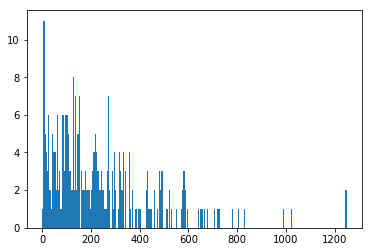

In [63]:
plt.hist(intermediate['likesPerPost'], 250)